In [1]:
#Read Data from File, Initialize related parameters
num_class <- 10
num_feat  <- 64
tr_dataset <- read.table("optdigits.tra", sep=",")
tr_num_inst <- dim(tr_dataset)[1]
tst_dataset <- read.table("optdigits.tes", sep=",")
tst_num_inst <- dim(tst_dataset)[1]

In [2]:
#Prepare Training Data
tr_dataset <- tr_dataset[ order(tr_dataset[,65]), ]
tr_labels <- matrix(0, nrow = nrow(tr_dataset), ncol = 1)

tr_labels[,1] <- tr_dataset[,65]
tr_labels <- tr_labels + 1
tr_data   <- tr_dataset[,1:64]

In [3]:
#Prepare Test Data
tst_dataset <- tst_dataset[ order(tst_dataset[,65]), ]
tst_labels <- matrix(0, nrow = nrow(tst_dataset), ncol = 1)

tst_labels[,1] <- tst_dataset[,65]
tst_labels <- tst_labels + 1
tst_data   <- tst_dataset[,1:64]

In [4]:
#Training&Test Data-Discard features with 0 variances. #Feature Elimination
tr_data_vars <- apply(tr_data, 2, var)
tr_data_fixed <- matrix(0, nrow = nrow(tr_dataset), ncol = 1)
tst_data_fixed <- matrix(0, nrow = nrow(tst_dataset), ncol = 1)
for(i in 1:num_feat){
    if(tr_data_vars[i] < 0.05) {
        next
    }
    tr_data_fixed <- cbind(tr_data_fixed, tr_data[,i])
    tst_data_fixed <- cbind(tst_data_fixed, tst_data[,i])
}
tr_data_fixed <- tr_data_fixed[,2:dim(tr_data_fixed)[2]]
tst_data_fixed <- tst_data_fixed[,2:dim(tst_data_fixed)[2]]

num_tr_fixed_feat <- dim(tr_data_fixed)[2]
num_tst_fixed_feat <- dim(tst_data_fixed)[2]
num_tst_fixed_feat

[1] 55

In [5]:
#Calculating Parameters for each Class
#calculate means of each dimension of each class (class means)

#Changing parameters once with tr and then with tst
class_means  <- matrix(0, nrow = num_class, ncol = num_tr_fixed_feat)
class_priors <- matrix(0, nrow = num_class, 1)
comm_cov     <- matrix(0, nrow = num_tr_fixed_feat, ncol = num_tr_fixed_feat)
for(i in 1:num_class){
    class_data <- subset(tr_data_fixed, tr_labels == i)
    class_means[i,] <- colMeans(class_data, na.rm = TRUE)
    class_priors[i] <- nrow(class_data) / tr_num_inst
    comm_cov <- comm_cov + class_priors[i] * cov(class_data)
}
global_mean = colMeans(class_means)

In [6]:
btw_class_scatter    <- matrix(520, nrow = num_tr_fixed_feat, ncol = num_tr_fixed_feat)
within_class_scatter <- matrix(0, nrow = num_tr_fixed_feat, ncol = num_tr_fixed_feat)

for (i in 1:num_class)
{
  class_data <- subset(tr_data_fixed, tr_labels == i)
  within_class_scatter = within_class_scatter + nrow(class_data)*cov(class_data)
  means_diff = as.vector(class_means[i,] - global_mean)
  btw_class_scatter = btw_class_scatter + nrow(class_data)* means_diff %*% t(means_diff)
}

In [7]:
inv_within_class_scatter <- solve(within_class_scatter)
eigen_v <- eigen(inv_within_class_scatter %*% btw_class_scatter)

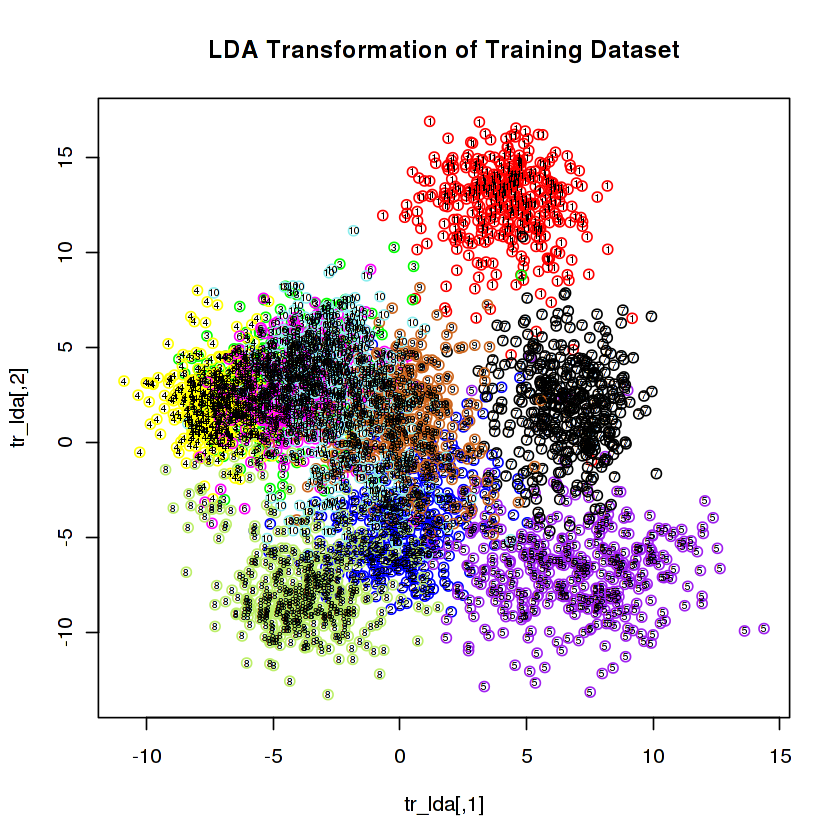

In [8]:
tr_lda <- tr_data_fixed %*% Re(eigen_v$vectors[,1:2])
x11()
plot(tr_lda,col=c("red", "blue","green","yellow","purple","magenta","black","darkolivegreen2","chocolate3","darkslategray2")[tr_labels])
text(tr_lda[,1],tr_lda[,2],tr_labels, cex=0.5)
title(main="LDA Transformation of Training Dataset")

In [70]:
dim(tst_data_fixed)

[1] 1797   55

In [71]:
tst_lda <- tst_data_fixed %*% Re(eigen_v$vectors[,1:2])

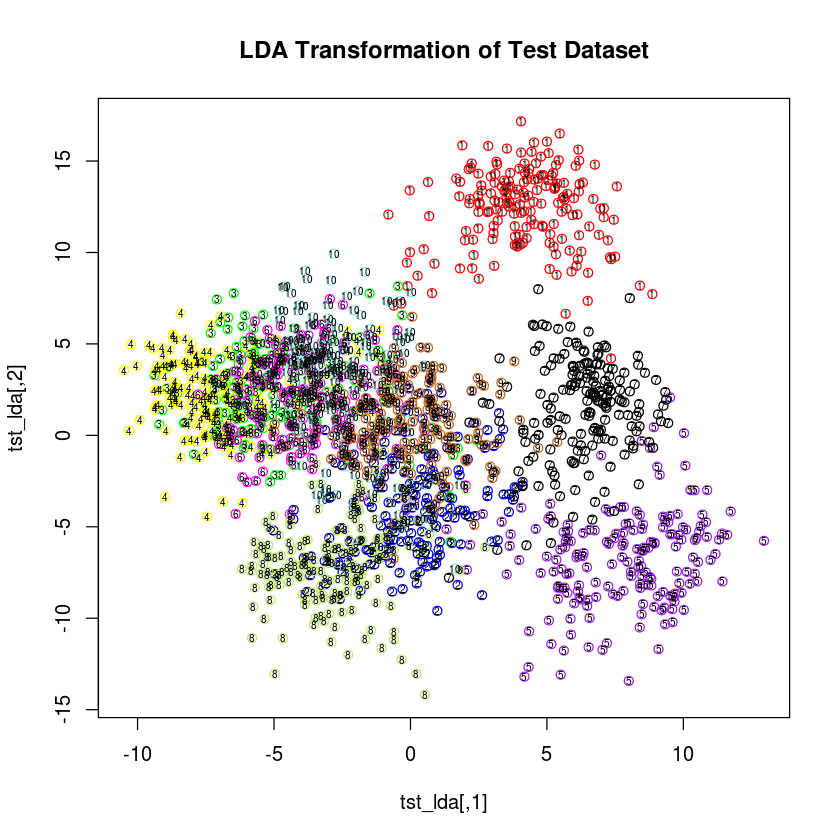

In [72]:
x11()
plot(tst_lda,col=c("red", "blue","green","yellow","purple","magenta","black","darkolivegreen2","chocolate3","darkslategray2")[tst_labels])
text(tst_lda[,1],tst_lda[,2],tst_labels,cex=0.5)
title(main="LDA Transformation of Test Dataset")